# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [226]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [227]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1721 to 1095
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1879 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1905 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1894 non-null   object 
 7   website url          1737 non-null   object 
 8   menu url             726 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1079 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [228]:
print(df_train.info())
df_train.head(2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1721 to 1095
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1879 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1905 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1894 non-null   object 
 7   website url          1737 non-null   object 
 8   menu url             726 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1079 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
1721,#31,Theatercafe T Foyer,4.5 of 5 bubbles,3 reviews,Cafe|Pub|Gastropub,"Spoorwegstraat 9, Geraardsbergen Belgium",+32 54 41 06 09,https://www.facebook.com/pages/category/Restau...,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Cafe, Pub, Gastropub",NaN,NaN,NaN,17332017
161,#1,Restaurant | Feestzaal Kasteel van Laarne,4.5 of 5 bubbles,83 reviews,$$ - $$$|French|Belgian|European,"Eekhoekstraat 7, Laarne 9270 Belgium",+32 9 230 71 78,http://www.kasteelvanlaarne-rest.be/,https://www.kasteelvanlaarne-rest.be/restauran...,False,info@kasteelvanlaarne-rest.be,False,False,4.5,4.5,4.5,-1.0,NaN,NaN,No pricing available,"Belgian, European, French",Vegetarian Friendly,"Lunch, Dinner","Reservations, Seating, Wheelchair Accessible, ...",8141966


we will start by turning rank, general rating, number of reviews to numerical values

In [229]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [230]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [231]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

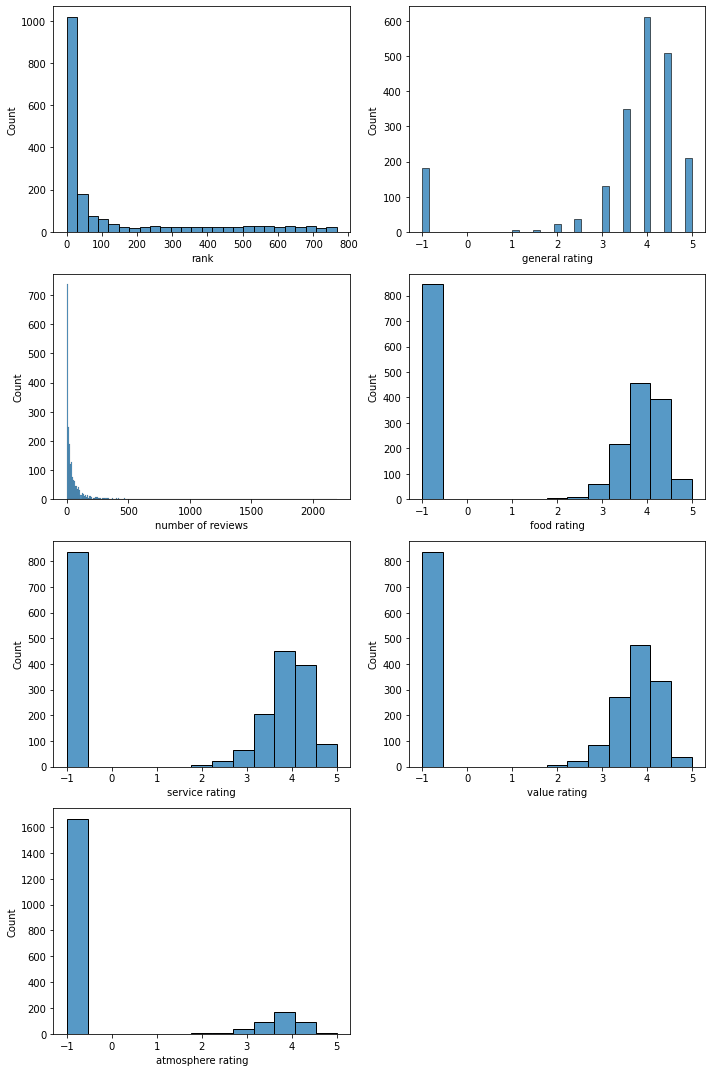

In [232]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

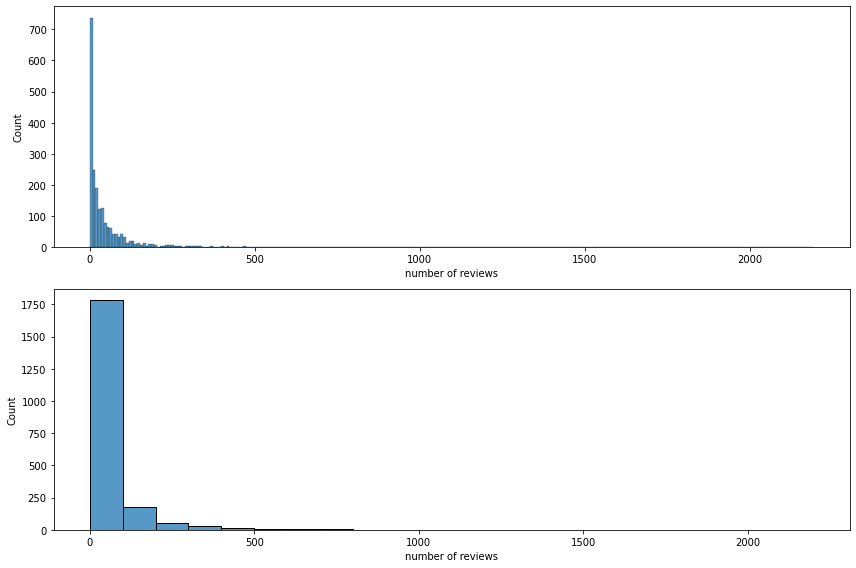

In [233]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [234]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      181
1.0      120
2.0      102
3.0       77
4.0       70
        ... 
395.0      1
325.0      1
175.0      1
233.0      1
215.0      1
Name: number of reviews, Length: 273, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [235]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.77% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [236]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 23.26%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe bcause of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [237]:
df_train['city'] = df_train['address'].str.split(" Belgium").str[0]
df_train['city'] = df_train['city'].str.split(",").str[-1]
df_train['city'] = df_train['city'].str.split(" ").str[1]

df_train

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id,city
1721,31.0,Theatercafe T Foyer,4.5,3.0,Cafe|Pub|Gastropub,"Spoorwegstraat 9, Geraardsbergen Belgium",+32 54 41 06 09,https://www.facebook.com/pages/category/Restau...,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Cafe, Pub, Gastropub",NaN,NaN,NaN,17332017,Geraardsbergen
161,1.0,Restaurant | Feestzaal Kasteel van Laarne,4.5,83.0,$$ - $$$|French|Belgian|European,"Eekhoekstraat 7, Laarne 9270 Belgium",+32 9 230 71 78,http://www.kasteelvanlaarne-rest.be/,https://www.kasteelvanlaarne-rest.be/restauran...,False,info@kasteelvanlaarne-rest.be,False,False,4.5,4.5,4.5,-1.0,NaN,NaN,No pricing available,"Belgian, European, French",Vegetarian Friendly,"Lunch, Dinner","Reservations, Seating, Wheelchair Accessible, ...",8141966,Laarne
585,1.0,De Cluysenaer,4.0,63.0,$$ - $$$|Belgian|European,"Kluizendorpstraat 82, Evergem 9940 Belgium",+32 9 357 73 37,http://www.cluysenaer.com/,https://www.cluysenaer.com/menu-1,False,NaN,False,False,4.0,4.0,4.0,4.0,NaN,NaN,€25 - €100,"Belgian, European",NaN,Dinner,"Reservations, Serves Alcohol, Table Service, S...",1233802,Evergem
669,9.0,RESTO Mont-Blanc,4.0,31.0,$$ - $$$|Belgian|European|Vegetarian Friendly,"Stationsstraat 30a, Wetteren 9230 Belgium",+32 9 369 24 21,http://www.mont-blanc-wetteren.be/,http://www.mont-blanc-wetteren.be/nl/menukaart,True,montblanc.9230@gmail.com,False,False,4.5,4.5,4.5,-1.0,Lekker gezellig restaurantje met een wereld ke...,NaN,€6 - €24,"Belgian, European",Vegetarian Friendly,"Lunch, Dinner","Reservations, Seating, Wheelchair Accessible, ...",8806773,Wetteren
2389,NaN,Happy Garden,-1.0,0.0,Chinese,"Botestraat 61, Wondelgem 9032 Belgium",+32 9 310 75 85,http://www.happygardengent.be/,NaN,True,NaN,False,False,-1.0,-1.0,-1.0,-1.0,Chinees afhaalrestaurant,Chinees afhaalrestaurant,No pricing available,Chinese,NaN,Dinner,NaN,23850345,Wondelgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,The Boondocks - American Steakhouse,4.0,215.0,$$ - $$$|American|Steakhouse|Grill,"Watermolenweg 102, Wichelen 9260 Belgium",+32 9 366 62 33,http://www.boondocks.be/,http://www.boondocks.be/menu.asp?id=1&lang=,True,NaN,False,False,4.5,4.0,4.0,4.0,NaN,NaN,€15 - €30,"American, Steakhouse, Grill",NaN,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Parkin...",3368355,Wichelen
1915,73.0,Pedro's,3.5,15.0,$$ - $$$|Belgian|International|European,"Kapelstraat 100 Waasland Shopping Center, Sint...",+32 3 776 28 82,https://www.pedroswaasland.be/,NaN,True,sander.ceuppens@gmail.com,False,False,3.5,3.5,3.5,-1.0,NaN,NaN,No pricing available,"Pub, Belgian, International, European, South A...",NaN,"Breakfast, Lunch, Dinner, Brunch, Drinks","Seating, Table Service, Reservations, Outdoor ...",12898106,Sint-Niklaas
602,7.0,Don Peppe Ristorante Pizzeria,4.0,114.0,$$ - $$$|Italian|Mediterranean|European,"Hundelgemsesteenweg 163, Merelbeke 9820 Belgium",+32 9 330 33 09,http://www.don-peppe.be/,NaN,True,NaN,False,False,4.0,3.5,3.5,3.0,NaN,NaN,€15 - €50,"Italian, European, Mediterranean",Vegetarian Friendly,"Lunch, Dinner","Takeout, Reservations, Seating, Highchairs Ava...",3681668,Merelbeke
1195,455.0,Westies,5.0,7.0,$|Mexican|American|Brazilian,"Sint-Pietersnieuwstraat 226, Ghent 9000 Belgium",+32 470 70 06 63,http://westies.business.site/,NaN,True,westiesgent@gmail.com,False,False,-1.0,-1.0,-1.0,-1.0,"West Coast meets Gent Both from the USA, both ...",NaN,€2 - €10,"Mexican, American, Brazilian, Bar, Pub, South ...",NaN,"Dinner, Late Night, Drinks","Takeout, Seating, Serves Alcohol, Full Bar, Wi...",13548163,Ghent


we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [238]:
df_train["address"]

1721             Spoorwegstraat 9, Geraardsbergen Belgium
161                  Eekhoekstraat 7, Laarne 9270 Belgium
585            Kluizendorpstraat 82, Evergem 9940 Belgium
669             Stationsstraat 30a, Wetteren 9230 Belgium
2389                Botestraat 61, Wondelgem 9032 Belgium
                              ...                        
84               Watermolenweg 102, Wichelen 9260 Belgium
1915    Kapelstraat 100 Waasland Shopping Center, Sint...
602       Hundelgemsesteenweg 163, Merelbeke 9820 Belgium
1195      Sint-Pietersnieuwstraat 226, Ghent 9000 Belgium
1095             Grote Markt 14, Dendermonde 9200 Belgium
Name: address, Length: 2064, dtype: object

### Correlation between rank and restaurant type?

In the next code block we try to find a correlation between the popularity of a restaurant and the type of restaurant. For example are Chinese restaurants the most popular? We find this out by using the average rank as popularity measure and the tags as restaurant type.

In [239]:
df_train_tags_cleaned = df_train.copy()

# splitting all the tags
df_train_tags_cleaned["tags"] = df_train_tags_cleaned["tags"].str.split("|")

# converting every tag into a new column
df_train_tags_cleaned = df_train_tags_cleaned.explode('tags').reset_index(drop=True)

# drop all tags with $ in
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").filter(lambda x : str(x).count("$") == 0)

# make a copy for in a later stage
df_train_tags_cleaned_copy = df_train_tags_cleaned.copy()

# keep the rank and tags column
df_train_tags_cleaned = df_train_tags_cleaned[["rank", "tags"]]



# group by tag and take the mean of all the ranks
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").mean()
df_train_tags_cleaned = df_train_tags_cleaned.dropna()
df_train_tags_cleaned = df_train_tags_cleaned.sort_values(by=["rank"]) # sorting
df_train_tags_cleaned


,rank
tags,
Cajun & Creole,3.0
Egyptian,5.0
Central European,6.8
Beijing Specialties,9.0
Shanghai,15.0
...,...
Central American,406.0
Pakistani,456.0
Halal,527.0


In the table above we can see which restaurant type is the most popular. It might be interesting to start a restaurant with one of the top ranked types to be popular.

### Where to open my restaurant?

If you know what type restaurant you want to open, a very important decision is to choose where to open your restaurant.
We want to know the following questions:

* Which city is has the highest average ranked restaurants?
* How many type restaurants are there in every city? (for example how many Chinese restaurants in Gent, Antwerpen, ...)

The answer on the following questions can give us insight on the location of the restaurant.

In the following codeblock we answer the first question, even though it's not sorted on the average rank. The reason why is because you would see as first the cities with one restaurant and a low (good) ranking. This doesn't tell us much, this is why we sort first on the amount of restaurants.

In [240]:
df_train_city = df_train[["city", "rank"]]

count = df_train_city.groupby("city").count()

df_train_city = df_train_city.dropna()
df_train_city = df_train_city.groupby("city").mean()
df_train_city["amount of restaurants"] = count
df_train_city = df_train_city.sort_values(by=["amount of restaurants", "rank"], ascending=[False, True])


df_train_city


,rank,amount of restaurants
city,,
Ghent,382.314785,629
Aalst,67.314286,105
Sint-Niklaas,55.458824,85
Dendermonde,32.468085,47
Lokeren,24.523810,42
...,...,...
Vrasene,1.000000,1
Zingem,1.000000,1
Vurste,2.000000,1


In the next codeblock we answer the second question. For every restaurant type you can see how many there are in each city (if the city is not mentionned it means 0)

In [241]:
df_train_city_type = df_train_tags_cleaned_copy[["city", "tags"]]
df_train_city_type = df_train_city_type.groupby(["tags", "city"])["city"].count().to_frame()
df_train_city_type = df_train_city_type.rename(columns={"city": "city_count"})


df_train_city_type

# Find how many Chinese restaurants there are. The cities that are missing means that there aren't any there
# df_train_city_type.loc["Chinese"]


city_count
tags       city                      
Afghan     Aalst                    1
           Geraardsbergen           1
           Ghent                    1
African    Eeklo                    1
           Ghent                    3
...                               ...
Vietnamese Steendorp                1
Wine Bar   Ghent                    7
           Lokeren                  1
           Oudenaarde               1
           Temse                    1

[1168 rows x 1 columns]

### Atmosphere clustering
Next we want to see if there are clusterings formed of restaurants with a high atmosphere rating. To start we plot every restaurant on the map

In [242]:
coords = pd.read_csv("coordinaten2.csv")

df_train_coords = df_train.merge(coords,on="id")

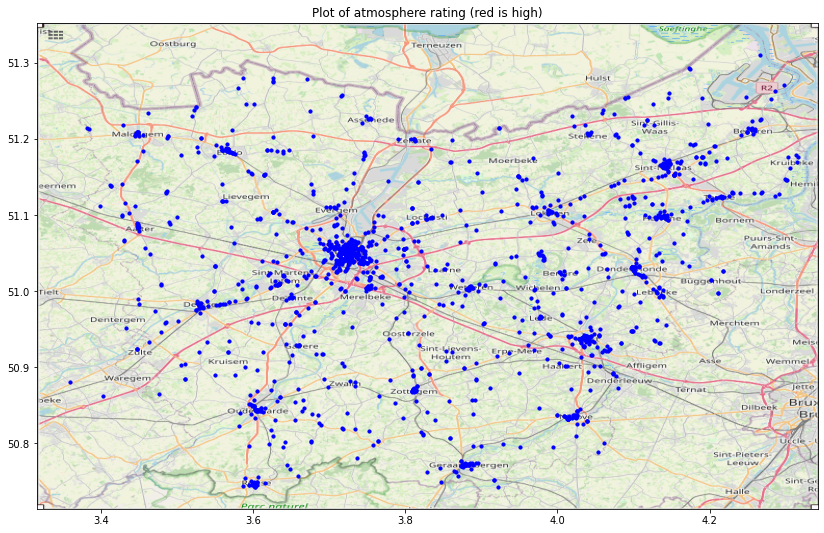

In [243]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords.longitude, df_train_coords.latitude, zorder=1, alpha= 1, c='b',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

To see if there is clustering, we map all the restaurants with a rating higher than 4.5 in red.

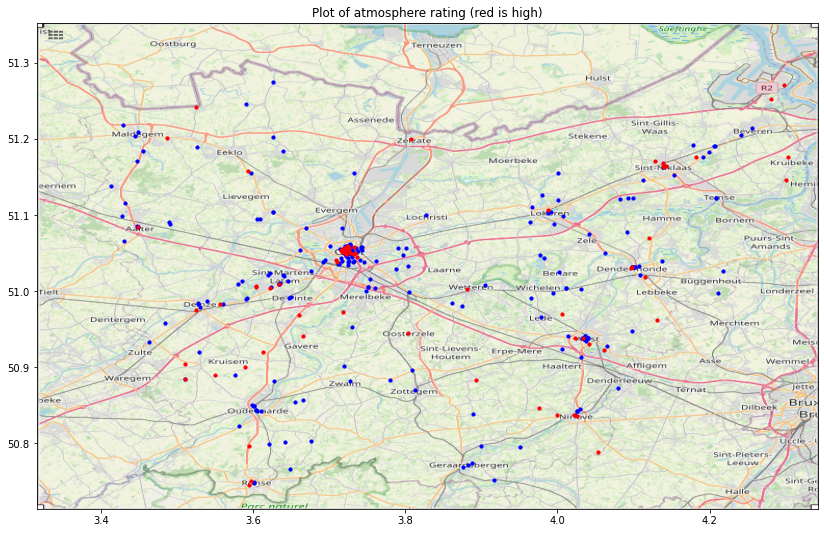

In [244]:
df_train_coords = df_train_coords.replace(-1, np.nan)

df_train_coords_low = df_train_coords[df_train_coords["atmosphere rating"] < 4.5]
df_train_coords_high = df_train_coords[df_train_coords["atmosphere rating"] >= 4.5]

Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords_low.longitude, df_train_coords_low.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(df_train_coords_high.longitude, df_train_coords_high.latitude, zorder=1, alpha= 1, c='r',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')


You can see that there are two clusters: Gent and Sint-Niklaas. Those places might have a pleasant ambience and can be a good place to locate a new restaurant.

### Restaurant features

When you start a new restaurant, you certainly don't want to offer less features than other restaurants. It can be handy to know which restaurant features there are available, but also which ones are not frequently offered. That's maybe where you can offer more.

In the next codeblock we make a table with the occurence the mentioned restaurant features.

In [245]:
df_train_copy = df_train.copy()
df_train_copy["restaurant features"] = df_train_copy["restaurant features"].str.split(",")
df_train_copy = df_train_copy.filter(["restaurant features", "rank"])

df_train_features_exploded = df_train_copy.explode('restaurant features').reset_index(drop=True)
df_train_features_exploded["restaurant features"] = df_train_features_exploded["restaurant features"].str.strip().str.lower()
df_train_features_exploded = df_train_features_exploded.dropna()

df_train_features_exploded.groupby("restaurant features").count()

df_train_features_exploded = df_train_features_exploded.rename(columns={"rank": "occurences"})
df_train_features_exploded = df_train_features_exploded.sort_values(by=["occurences"], ascending=False)

df_train_features_exploded

,restaurant features,occurences
8138,takeout,767.0
8155,accepts american express,766.0
8159,table service,766.0
8148,reservations,766.0
8149,seating,766.0
...,...,...
1872,free wifi,1.0
1873,accepts credit cards,1.0
7130,highchairs available,1.0
7129,table service,1.0


### International popularity

Which restaurants have international reviews? Are international tourists more likely to eat in big cities or in small, local restaurants? To detect international reviews we made only a difference between languages that uses ASCII characters between 0-256. Anything higher we assume is international (such as Chinese, Arabic, ...)



In [246]:
def language_detector(text):
    """
    true means it's western language (English, Dutch, ...)
    false means it's an exotic language (Chinese, Arabic, ...)
    """
    text = str(text)
    west_count = 0
    exotic_count = 0
    for kar in text:
        ascii = ord(kar)
        if ascii > 256:
            exotic_count += 1
        else:
            west_count += 1
    
    return west_count > exotic_count

df_reviews = pd.read_csv("tripadvisor_dataset/reviews.csv")
df_reviews_train, df_reviews_test = train_test_split(df_reviews, test_size=0.2)

df_reviews_train["western"] = df_reviews_train["review"].apply(lambda x: language_detector(x))

df_reviews_train_false = df_reviews_train[df_reviews_train.western == False]
df_reviews_train_false


,id,reviewer name,title,date,rating,review,western
92320,3784184,Roman_Hornett,Атмосферный бар с огромной пивной картой,"May 22, 2015",5.0,Намоленное местечко в переулке рядом с красным...,False
11322,814598,YuMaLT,Очень достойно.,"January 18, 2017",5.0,Классный ресторан в центре. Народу - битком.Но...,False
57933,1592412,JeeyoungH10,"친절한 서비스, 멋진 뷰, 가성비 좋은 음식","April 29, 2018",4.0,홍합을 먹으러 갔지만 아쉽게도 season 이 아니라 주문할 수 없었다. 그 대신 ...,False
127511,17728370,tyapatsuD,店の雰囲気は良い,"March 22, 2020",3.0,時間つぶしで利用しました。飲み物だけでしたが味は至って普通でした。立地上観光客向けの店といっ...,False
33787,3448259,summertw1128,黑安格斯超好吃！,"July 25, 2019",5.0,肉非常非常的嫩，沙拉也很好吃，氣氛很好，雖然沒有AC，但食物真的太好吃了！來這裡一定要點bl...,False
...,...,...,...,...,...,...,...
41699,796954,volkovapolina,Модная Бельгия,"September 7, 2016",5.0,Этот ресторан нам посоветовал хозяин наших апа...,False
44375,740683,Nittama,Пантагрюэлизм,"October 30, 2017",4.0,Если вы сторонник безудержных гастрономических...,False
52252,3600615,AlexGoncharov,Приятный ресторан,"June 2, 2015",4.0,"Очень хороший ресторан, расположенный недалеко...",False
131749,10365168,yialos11,Καλή τοποθεσία,"August 15, 2018",3.0,"Ωραία τοποθεσία, είτε στον εσωτερικό είτε στον...",False


In [247]:

df_reviews_train_false = df_reviews_train_false.groupby("id").count()

df_reviews_train_false = df_reviews_train_false.filter(["id", "date"])
df_reviews_train_false = df_reviews_train_false.rename(columns={"date": "occurences"})
df_reviews_train_false = df_reviews_train_false.sort_values(by=["occurences"], ascending=False)

df_reviews_train_false

,occurences
id,
740683,44
814598,44
1058490,35
796954,30
1913510,27
...,...
740613,1
4014169,1
4371274,1


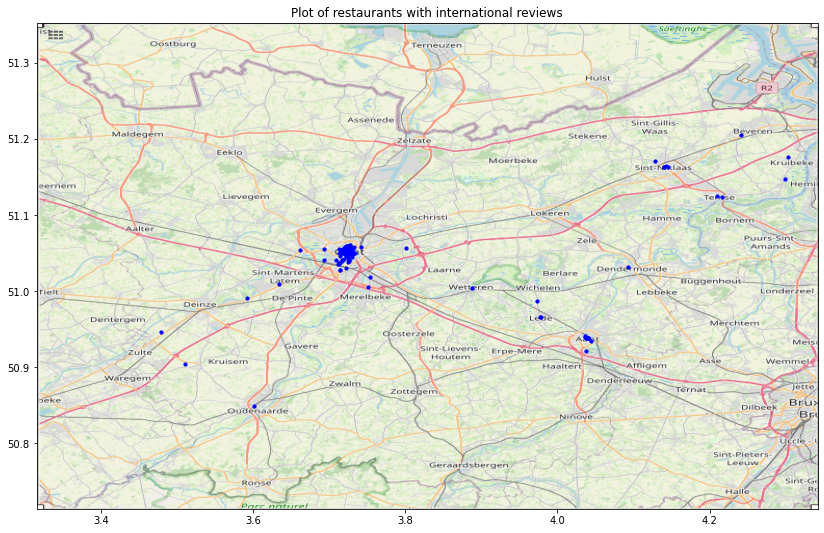

In [248]:

df_reviews_train_merged_coords = df_reviews_train_false.merge(coords, on="id")

Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_reviews_train_merged_coords.longitude, df_reviews_train_merged_coords.latitude, zorder=1, alpha= 1, c='b',s=10)

ax.set_title('Plot of restaurants with international reviews')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

We can clearly see a cluster of restaurants in Ghent. Popular cities attract more international customers than small local cities.

It's also interesting to see to what restaurant type international people comes the most

In [249]:
df_reviews_train_false_merged = df_reviews_train_false.merge(df_train, on="id")
df_reviews_train_false_merged["tags"] = df_reviews_train_false_merged["tags"].str.split("|")
df_reviews_train_false_merged = df_reviews_train_false_merged.explode('tags').reset_index(drop=True)
df_reviews_train_false_merged = df_reviews_train_false_merged.groupby("tags").filter(lambda x : str(x).count("$") == 0)
df_reviews_train_false_merged = df_reviews_train_false_merged[["occurences", "tags"]]
df_reviews_train_false_merged = df_reviews_train_false_merged.groupby("tags").sum().sort_values(by=["occurences"], ascending=False)
df_reviews_train_false_merged

,occurences
tags,
Belgian,499
European,379
Vegetarian Friendly,156
Bar,109
Seafood,89
Dutch,84
French,78
Barbecue,55
Cafe,50


It makes sense

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer